In [1]:
# Import packages

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load clean data from csv file 

In [4]:
df = pd.read_csv('clear_data.csv', sep = ';').drop(columns = ['Unnamed: 0'])

In [5]:
df.head()

,YearsCode,Age1stCode,YearsCodePro,JobSeek,WorkWeekHrs,Age,MainBranch_I am a developer by profession,MainBranch_I am a student who is learning to code,"MainBranch_I am not primarily a developer, but I write code sometimes as part of my work",MainBranch_I code primarily as a hobby,...,Sexuality_Bisexual,Sexuality_Gay or Lesbian,Sexuality_Queer,Sexuality_Straight / Heterosexual,SurveyLength_Appropriate in length,SurveyLength_Too long,SurveyLength_Too short,SurveyEase_Difficult,SurveyEase_Easy,SurveyEase_Neither easy nor difficult
0,3.0,22.0,1.0,"I’m not actively looking, but I am open to new...",40.0,28.0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
1,3.0,16.0,0.5,I am not interested in new job opportunities,80.0,22.0,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0
2,16.0,14.0,9.0,I am not interested in new job opportunities,55.0,30.0,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0
3,13.0,15.0,3.0,I am not interested in new job opportunities,15.0,28.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
4,6.0,17.0,4.0,"I’m not actively looking, but I am open to new...",32.0,42.0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [7]:
df['JobSeek'].value_counts()

I’m not actively looking, but I am open to new opportunities    76248
I am not interested in new job opportunities                    33871
I am actively looking for a job                                 20775
Name: JobSeek, dtype: int64

In [6]:
# Devide data into input and target varbiables

In [179]:
df = df[df['JobSeek'] != 'I’m not actively looking, but I am open to new opportunities']

In [9]:
# Keep class balances
df_not_interested = df[df['JobSeek'] == "I am not interested in new job opportunities"].sample(n=20775, random_state=123)
df_actively = df[df['JobSeek'] == "I am actively looking for a job"]

In [10]:
# Join two balanced dataframes into one dataframe
df = pd.concat([df_not_interested, df_actively])

In [27]:
df = df.sample(frac=1)

In [28]:
df

,YearsCode,Age1stCode,YearsCodePro,JobSeek,WorkWeekHrs,Age,MainBranch_I am a developer by profession,MainBranch_I am a student who is learning to code,"MainBranch_I am not primarily a developer, but I write code sometimes as part of my work",MainBranch_I code primarily as a hobby,...,Sexuality_Bisexual,Sexuality_Gay or Lesbian,Sexuality_Queer,Sexuality_Straight / Heterosexual,SurveyLength_Appropriate in length,SurveyLength_Too long,SurveyLength_Too short,SurveyEase_Difficult,SurveyEase_Easy,SurveyEase_Neither easy nor difficult
104144,12.0,14.0,3.0,I am not interested in new job opportunities,40.0,39.0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
120953,5.0,12.0,1.0,I am not interested in new job opportunities,50.0,24.0,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0
80921,40.0,15.0,33.0,I am actively looking for a job,45.0,56.0,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0
26036,8.0,12.0,6.0,I am not interested in new job opportunities,35.0,28.0,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0
104228,9.0,14.0,5.0,I am not interested in new job opportunities,40.0,26.0,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122686,17.0,20.0,13.0,I am not interested in new job opportunities,40.0,37.0,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0
7024,8.0,11.0,5.0,I am not interested in new job opportunities,40.0,25.0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
21827,20.0,8.0,13.0,I am actively looking for a job,50.0,30.0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
91643,22.0,14.0,5.0,I am not interested in new job opportunities,40.0,26.0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1


In [29]:
df['JobSeek'].value_counts()

I am not interested in new job opportunities    20775
I am actively looking for a job                 20775
Name: JobSeek, dtype: int64

In [30]:
X = df.drop(columns = ['JobSeek'])

In [31]:
Y = df.JobSeek

In [32]:
# We have to transform string data into numerical

In [33]:
Y.value_counts()

I am not interested in new job opportunities    20775
I am actively looking for a job                 20775
Name: JobSeek, dtype: int64

In [34]:
# Now, we've got 2 classes

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
encoder = LabelEncoder()

In [37]:
y = encoder.fit_transform(Y)

In [38]:
y

array([1, 1, 0, ..., 0, 1, 0])

In [39]:
# Now we have numerical target variable

In [40]:
# Of course, we can transform it into string with our encoder

In [41]:
y[0:10]

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1])

In [42]:
# Example:
encoder.inverse_transform(y[0:20])

array(['I am not interested in new job opportunities',
       'I am not interested in new job opportunities',
       'I am actively looking for a job',
       'I am not interested in new job opportunities',
       'I am not interested in new job opportunities',
       'I am actively looking for a job',
       'I am actively looking for a job',
       'I am not interested in new job opportunities',
       'I am not interested in new job opportunities',
       'I am not interested in new job opportunities',
       'I am actively looking for a job',
       'I am actively looking for a job',
       'I am actively looking for a job',
       'I am not interested in new job opportunities',
       'I am actively looking for a job',
       'I am not interested in new job opportunities',
       'I am not interested in new job opportunities',
       'I am actively looking for a job',
       'I am not interested in new job opportunities',
       'I am actively looking for a job'], dtype=object)

In [43]:
# Correlation analysis

In [44]:
corr_matrix = X.corr()

In [45]:
corr_matrix

,YearsCode,Age1stCode,YearsCodePro,WorkWeekHrs,Age,MainBranch_I am a developer by profession,MainBranch_I am a student who is learning to code,"MainBranch_I am not primarily a developer, but I write code sometimes as part of my work",MainBranch_I code primarily as a hobby,"MainBranch_I used to be a developer by profession, but no longer am",...,Sexuality_Bisexual,Sexuality_Gay or Lesbian,Sexuality_Queer,Sexuality_Straight / Heterosexual,SurveyLength_Appropriate in length,SurveyLength_Too long,SurveyLength_Too short,SurveyEase_Difficult,SurveyEase_Easy,SurveyEase_Neither easy nor difficult
YearsCode,1.000000,-0.298508,0.723345,0.020197,0.662355,0.231078,-0.323998,0.054936,NaN,NaN,...,-0.038954,-0.001740,-0.005198,0.087547,0.058922,-0.036056,-0.024127,-0.034541,0.066213,-0.041351
Age1stCode,-0.298508,1.000000,-0.122467,-0.004925,0.029746,-0.080817,0.078135,0.023903,NaN,NaN,...,-0.026862,-0.038059,-0.014675,-0.027082,-0.065193,0.071900,-0.035460,0.020427,-0.059342,0.043856
YearsCodePro,0.723345,-0.122467,1.000000,0.021074,0.581734,-0.004761,0.007039,-0.001578,NaN,NaN,...,-0.035299,-0.016166,-0.012201,0.033538,0.018950,-0.009276,-0.015618,-0.009146,0.025861,-0.018412
WorkWeekHrs,0.020197,-0.004925,0.021074,1.000000,0.015170,0.000468,-0.001295,0.000894,NaN,NaN,...,-0.001447,-0.007765,-0.005282,0.011471,0.000850,0.000307,0.001136,0.000109,0.008814,-0.008272
Age,0.662355,0.029746,0.581734,0.015170,1.000000,0.146278,-0.263820,0.106745,NaN,NaN,...,-0.054674,-0.017910,-0.009296,0.061199,0.009991,0.005743,-0.034948,-0.014834,0.024431,-0.016918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SurveyLength_Too long,-0.036056,0.071900,-0.009276,0.000307,0.005743,0.005206,-0.022675,0.020081,NaN,NaN,...,-0.031227,-0.039152,-0.021294,-0.036615,-0.851216,1.000000,-0.104210,0.162818,-0.162639,0.160879
SurveyLength_Too short,-0.024127,-0.035460,-0.015618,0.001136,-0.034948,-0.023564,0.033032,-0.005593,NaN,NaN,...,0.023131,0.016585,0.017053,-0.018339,-0.242505,-0.104210,1.000000,0.018604,0.053456,-0.051915
SurveyEase_Difficult,-0.034541,0.020427,-0.009146,0.000109,-0.014834,-0.005973,0.011819,-0.005640,NaN,NaN,...,0.004180,-0.000139,0.000728,-0.055050,-0.150337,0.162818,0.018604,1.000000,-0.191050,-0.090486
SurveyEase_Easy,0.066213,-0.059342,0.025861,0.008814,0.024431,0.050243,-0.053547,-0.008767,NaN,NaN,...,0.005518,0.021286,0.004585,0.193852,0.234628,-0.162639,0.053456,-0.191050,1.000000,-0.876112


In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41550 entries, 104144 to 60523
Columns: 584 entries, YearsCode to SurveyEase_Neither easy nor difficult
dtypes: float64(5), int64(579)
memory usage: 185.4 MB


In [47]:
X['YearsCode'].corr(X['MainBranch_I code primarily as a hobby'])

nan

In [48]:
X['MainBranch_I code primarily as a hobby'].sort_values().values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
cols_nan_corr = corr_matrix.columns[corr_matrix.isna().sum() > 5]
cols_nan_corr

Index(['MainBranch_I code primarily as a hobby',
       'MainBranch_I used to be a developer by profession, but no longer am',
       'MainBranch_None', 'Employment_Not employed, and not looking for work',
       'Employment_Retired'],
      dtype='object')

In [50]:
# Remove columns with nan correlation
X = X.drop(columns = cols_nan_corr)

In [51]:
corr_matrix_upd = X.corr().abs()

In [52]:
# There are no nan correlation values
corr_matrix_upd.columns[corr_matrix_upd.isna().any()]

Index([], dtype='object')

In [53]:
# Max correlation threshold
thresh = 0.6

In [54]:
# Remove high correlated features

In [55]:
# Upper tridiagonal matrix
upper_trid_corr = corr_matrix_upd.where(np.triu(np.ones(corr_matrix_upd.shape), k=1).astype(np.bool))

In [56]:
# Get trid columns
trid_columns = upper_trid_corr.columns

In [57]:
# Get high correlated features
high_corr_features = [column for column in trid_columns if any(upper_trid_corr[column] > thresh)]

In [58]:
len(high_corr_features)

165

In [59]:
high_corr_features

['YearsCodePro',
 'Age',
 'MainBranch_I am a student who is learning to code',
 'Hobbyist_Yes',
 'CurrencySymbol_AED',
 'CurrencySymbol_AMD',
 'CurrencySymbol_ARS',
 'CurrencySymbol_AUD',
 'CurrencySymbol_AZN',
 'CurrencySymbol_BAM',
 'CurrencySymbol_BDT',
 'CurrencySymbol_BGN',
 'CurrencySymbol_BRL',
 'CurrencySymbol_BYN',
 'CurrencySymbol_CAD',
 'CurrencySymbol_CHF',
 'CurrencySymbol_CLP',
 'CurrencySymbol_CNY',
 'CurrencySymbol_COP',
 'CurrencySymbol_CRC',
 'CurrencySymbol_CZK',
 'CurrencySymbol_DKK',
 'CurrencySymbol_DOP',
 'CurrencySymbol_EGP',
 'CurrencySymbol_ETB',
 'CurrencySymbol_GBP',
 'CurrencySymbol_GEL',
 'CurrencySymbol_GHS',
 'CurrencySymbol_GTQ',
 'CurrencySymbol_HKD',
 'CurrencySymbol_HRK',
 'CurrencySymbol_HUF',
 'CurrencySymbol_IDR',
 'CurrencySymbol_ILS',
 'CurrencySymbol_INR',
 'CurrencySymbol_IRR',
 'CurrencySymbol_ISK',
 'CurrencySymbol_JOD',
 'CurrencySymbol_JPY',
 'CurrencySymbol_KES',
 'CurrencySymbol_KRW',
 'CurrencySymbol_KZT',
 'CurrencySymbol_LBP',
 'Curre

In [60]:
# No correlation dataframe
X_noCorr = X.drop(columns=high_corr_features)

In [61]:
# We reduced dataframe to lower number of columns
X_noCorr

,YearsCode,Age1stCode,WorkWeekHrs,MainBranch_I am a developer by profession,"MainBranch_I am not primarily a developer, but I write code sometimes as part of my work",Hobbyist_No,Employment_Employed full-time,Employment_Employed part-time,"Employment_Independent contractor, freelancer, or self-employed","Employment_Not employed, but looking for work",...,Trans_No,Trans_Yes,Sexuality_Bisexual,Sexuality_Gay or Lesbian,Sexuality_Queer,Sexuality_Straight / Heterosexual,SurveyLength_Appropriate in length,SurveyLength_Too short,SurveyEase_Difficult,SurveyEase_Easy
104144,12.0,14.0,40.0,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
120953,5.0,12.0,50.0,1,0,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,1
80921,40.0,15.0,45.0,1,0,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,1
26036,8.0,12.0,35.0,1,0,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,1
104228,9.0,14.0,40.0,1,0,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122686,17.0,20.0,40.0,1,0,1,1,0,0,0,...,1,0,0,0,0,1,1,0,0,1
7024,8.0,11.0,40.0,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
21827,20.0,8.0,50.0,1,0,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
91643,22.0,14.0,40.0,0,1,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0


In [62]:
# Train test split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_noCorr, y, test_size=0.25, random_state=323)

In [65]:
from sklearn.preprocessing import MinMaxScaler
# Create a scaler
min_max_scaler = MinMaxScaler()

In [66]:
# Normlaize data with min_max_scaler
x_train_norm = min_max_scaler.fit_transform(X_train)
x_test_norm = min_max_scaler.transform(X_test)

In [67]:
# Train and test data shape

In [68]:
x_train_norm.shape

(31162, 414)

In [69]:
x_test_norm.shape

(10388, 414)

In [89]:
# ROC Curve for further data analysis

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

def plot_ROC(y_proba, y_test, model_str):
    # Predicting proba
    # Only positive values
    model_probs = y_proba[:, 1]
    # Calculation roc_auc for no-skill and model
    ns_probs = [0 for _ in range(len(model_probs))]
    ns_auc = roc_auc_score(y_test, ns_probs)
    model_auc = roc_auc_score(y_test, model_probs)
    # Summary
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print(model_str+' ROC AUC=%.3f' % (model_auc))
    # ROC curves calculation
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, model_probs)
    # Plot ROC curve
    plt.figure(figsize=(12,4))
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=model_str)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [90]:
# 1. Logistic regression

In [91]:
from sklearn.linear_model import LogisticRegression

In [73]:
# Create logistic regression model
logistic = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, penalty='l2', C=0.5)

In [74]:
# Fit model
logistic.fit(x_train_norm, y_train)

LogisticRegression(C=0.5, max_iter=500, multi_class='multinomial')

In [75]:
# Make a prediction
logistic_preds = logistic.predict(x_test_norm)

In [76]:
from sklearn.metrics import confusion_matrix, classification_report

In [77]:
confusion_matrix(y_test, logistic_preds)

array([[4403,  833],
       [ 858, 4294]], dtype=int64)

In [78]:
print(classification_report(y_test, logistic_preds))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5236
           1       0.84      0.83      0.84      5152

    accuracy                           0.84     10388
   macro avg       0.84      0.84      0.84     10388
weighted avg       0.84      0.84      0.84     10388



In [79]:
# Probability
logistic_proba = logistic.predict_proba(x_test_norm)

No Skill: ROC AUC=0.500
Logistic regression ROC AUC=0.911


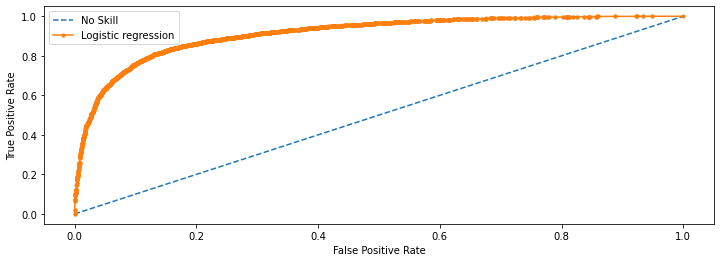

In [92]:
# ROC Curve
plot_ROC(logistic_proba, y_test, 'Logistic regression')

In [81]:
# 2. Decision tree

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [131]:
tree_model = DecisionTreeClassifier(max_depth=6)

In [132]:
tree_model.fit(x_train_norm, y_train)

DecisionTreeClassifier(max_depth=6, max_features=200)

In [133]:
tree_preds = tree_model.predict(x_test_norm)

In [134]:
confusion_matrix(y_test, tree_preds)

array([[4448,  788],
       [1158, 3994]], dtype=int64)

In [135]:
print(classification_report(y_test, tree_preds))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      5236
           1       0.84      0.78      0.80      5152

    accuracy                           0.81     10388
   macro avg       0.81      0.81      0.81     10388
weighted avg       0.81      0.81      0.81     10388



No Skill: ROC AUC=0.500
Decision tree ROC AUC=0.877


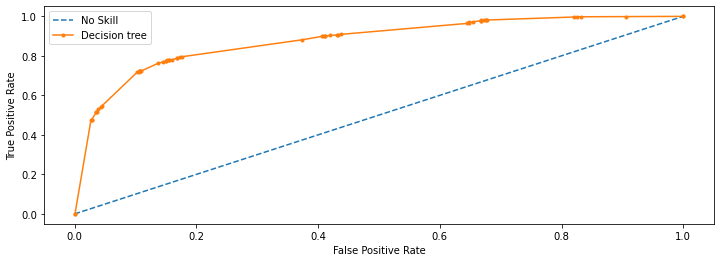

In [136]:
# Probability
tree_proba = tree_model.predict_proba(x_test_norm)

# ROC Curve
plot_ROC(tree_proba, y_test, 'Decision tree')

In [100]:
# 3. Random forest classifier

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
forest_model = RandomForestClassifier(n_estimators=300)

In [138]:
forest_model.fit(x_train_norm, y_train)

RandomForestClassifier(n_estimators=300)

In [139]:
y_forest_pred = forest_model.predict(x_test_norm)

In [140]:
confusion_matrix(y_test, y_forest_pred)

array([[4542,  694],
       [1014, 4138]], dtype=int64)

In [141]:
print(classification_report(y_test, y_forest_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      5236
           1       0.86      0.80      0.83      5152

    accuracy                           0.84     10388
   macro avg       0.84      0.84      0.84     10388
weighted avg       0.84      0.84      0.84     10388



No Skill: ROC AUC=0.500
Random forest ROC AUC=0.911


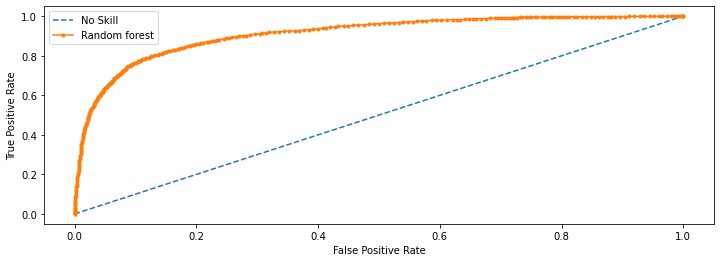

In [142]:
# Probability
rf_proba = forest_model.predict_proba(x_test_norm)

# ROC Curve
plot_ROC(rf_proba, y_test, 'Random forest')

In [143]:
# 4. XGBoost
import xgboost

In [184]:
xgboost_c = xgboost.XGBClassifier(n_estimators=200, reg_alpha=10)

In [185]:
xgboost_c.fit(x_train_norm, y_train)

C:\Users\Marcin\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:55:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [186]:
y_xgb_pred = xgboost_c.predict(x_test_norm) 

In [187]:
confusion_matrix(y_test, y_xgb_pred)

array([[4461,  775],
       [ 905, 4247]], dtype=int64)

In [188]:
print(classification_report(y_test, y_xgb_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      5236
           1       0.85      0.82      0.83      5152

    accuracy                           0.84     10388
   macro avg       0.84      0.84      0.84     10388
weighted avg       0.84      0.84      0.84     10388



No Skill: ROC AUC=0.500
XGBoost classifier ROC AUC=0.915


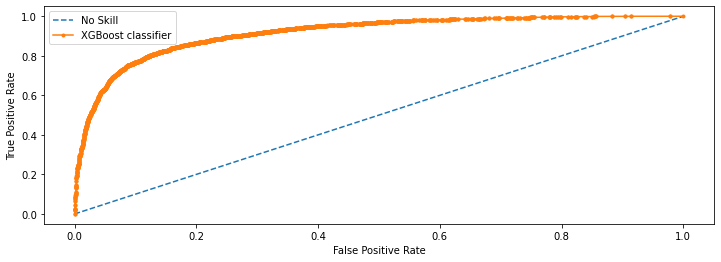

In [190]:
# Probability
xgb_proba = xgboost_c.predict_proba(x_test_norm)

# ROC Curve
plot_ROC(xgb_proba, y_test, 'XGBoost classifier')

In [191]:
# PCA

In [192]:
from sklearn.decomposition import PCA

In [193]:
pca = PCA(n_components=100)

In [194]:
# Transformation
x_train_norm_PCA = pca.fit_transform(x_train_norm)

In [195]:
x_test_norm_PCA = pca.transform(x_test_norm)

In [196]:
x_train_norm_PCA.shape

(31162, 100)

In [197]:
# Logistic
# Create logistic regression model
logistic_pca = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, penalty='l2', C=0.5)
# Fit model
logistic_pca.fit(x_train_norm_PCA, y_train)
# Make a prediction
y_logistic_preds_pca = logistic_pca.predict(x_test_norm_PCA)

In [198]:
confusion_matrix(y_test, y_logistic_preds_pca)

array([[4426,  810],
       [1038, 4114]], dtype=int64)

In [199]:
print(classification_report(y_test, y_logistic_preds_pca))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      5236
           1       0.84      0.80      0.82      5152

    accuracy                           0.82     10388
   macro avg       0.82      0.82      0.82     10388
weighted avg       0.82      0.82      0.82     10388



No Skill: ROC AUC=0.500
Logistic PCA, classifier ROC AUC=0.897


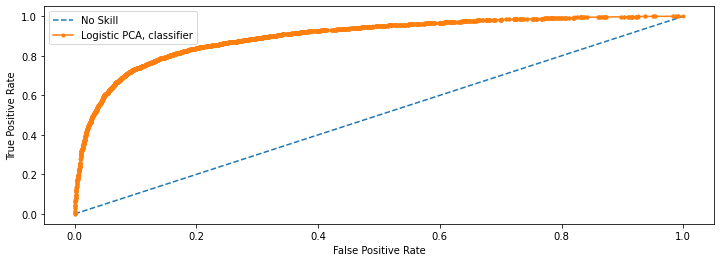

In [201]:
# Probability
logistic_pca_proba = logistic_pca.predict_proba(x_test_norm_PCA)

# ROC Curve
plot_ROC(logistic_pca_proba, y_test, 'Logistic PCA, classifier')

In [214]:
# Tree
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier(max_depth=8)
decision_tree_model.fit(x_train_norm_PCA, y_train)
y_pred_tree_PCA = decision_tree_model.predict(x_test_norm_PCA)

In [215]:
confusion_matrix(y_test, y_pred_tree_PCA)

array([[3785, 1451],
       [1466, 3686]], dtype=int64)

In [216]:
print(classification_report(y_test, y_pred_tree_PCA))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      5236
           1       0.72      0.72      0.72      5152

    accuracy                           0.72     10388
   macro avg       0.72      0.72      0.72     10388
weighted avg       0.72      0.72      0.72     10388



No Skill: ROC AUC=0.500
Decision tree PCA, classifier ROC AUC=0.774


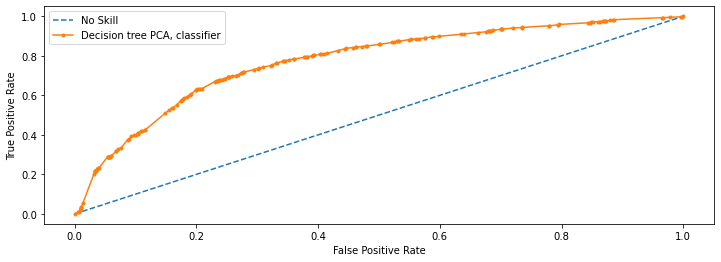

In [217]:
# Probability
tree_pca_proba = decision_tree_model.predict_proba(x_test_norm_PCA)

# ROC Curve
plot_ROC(tree_pca_proba, y_test, 'Decision tree PCA, classifier')

In [220]:
# RandomForest
rf_model = RandomForestClassifier(n_estimators = 150)
rf_model.fit(x_train_norm_PCA, y_train)
y_pred_rf_PCA = rf_model.predict(x_test_norm_PCA)

In [221]:
confusion_matrix(y_test, y_pred_rf_PCA)

array([[4349,  887],
       [1188, 3964]], dtype=int64)

In [222]:
print(classification_report(y_test, y_pred_rf_PCA))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      5236
           1       0.82      0.77      0.79      5152

    accuracy                           0.80     10388
   macro avg       0.80      0.80      0.80     10388
weighted avg       0.80      0.80      0.80     10388



No Skill: ROC AUC=0.500
RF PCA, classifier ROC AUC=0.774


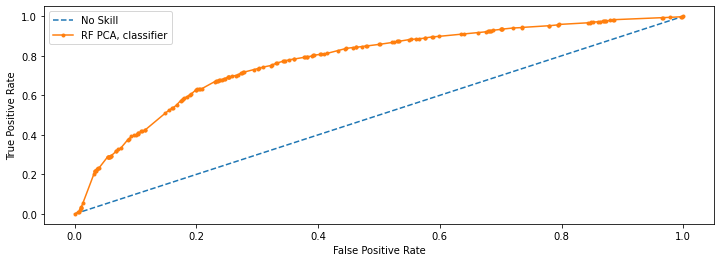

In [224]:
# Probability
rf_pca_proba = decision_tree_model.predict_proba(x_test_norm_PCA)

# ROC Curve
plot_ROC(rf_pca_proba, y_test, 'RF PCA, classifier')

In [225]:
#XGBC
xgboost_c = xgboost.XGBClassifier()
xgboost_c.fit(x_train_norm_PCA, y_train)
y_xgb_pred_PCA = xgboost_c.predict(x_test_norm_PCA)

C:\Users\Marcin\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:58:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [226]:
confusion_matrix(y_test, y_xgb_pred_PCA)

array([[4335,  901],
       [1063, 4089]], dtype=int64)

In [227]:
print(classification_report(y_test, y_xgb_pred_PCA))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      5236
           1       0.82      0.79      0.81      5152

    accuracy                           0.81     10388
   macro avg       0.81      0.81      0.81     10388
weighted avg       0.81      0.81      0.81     10388



No Skill: ROC AUC=0.500
XGB PCA, classifier ROC AUC=0.884


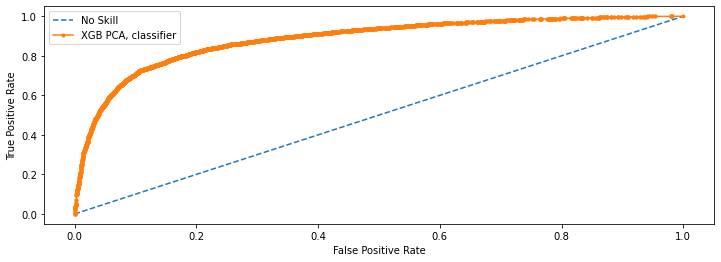

In [229]:
# Probability
xgb_pca_proba = xgboost_c.predict_proba(x_test_norm_PCA)

# ROC Curve
plot_ROC(xgb_pca_proba, y_test, 'XGB PCA, classifier')